Используем обученную нейросеть для детекции бургер-меню

In [1]:
import torch
import torchvision
import numpy as np
import pandas as pd
import os
import cv2
import time
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow
from torch.utils.data import Dataset, DataLoader

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN

from torchvision.ops.boxes import nms

from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [15]:
test_dir = '/content/gdrive/MyDrive/Images/150.jpg'

In [11]:
weights_dir = '/content/gdrive/MyDrive/Weights_ML/burger_weights_2.pth'

def create_model(num_classes, pretrained=False):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=pretrained)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
map_locationb=torch.device('cpu')
model = create_model(2).to(device)
model.load_state_dict(torch.load(weights_dir))

def draw_predict(iou_threshold=0.1, threshold=0.8, scale_percent=100):
    model.eval()
    img = cv2.imread(os.path.join(test_dir))
    img_ = img / 255.
    img_ = torch.from_numpy(img_).permute(2, 0, 1).unsqueeze(0).to(torch.float).to(device)
    predict = model(img_)
    ind = nms(predict[0]['boxes'], predict[0]['scores'], iou_threshold).detach().cpu().numpy()
    for i, box in enumerate(predict[0]['boxes'][ind]):
        if predict[0]['scores'][i] > threshold:
            cv2.rectangle(img, 
                    (int(box[0]), int(box[1])), 
                    (int(box[2]), int(box[3])), 
                    (0, 0, 255), 4)
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)   
    img = cv2.resize(img, dim)
    cv2_imshow(img)

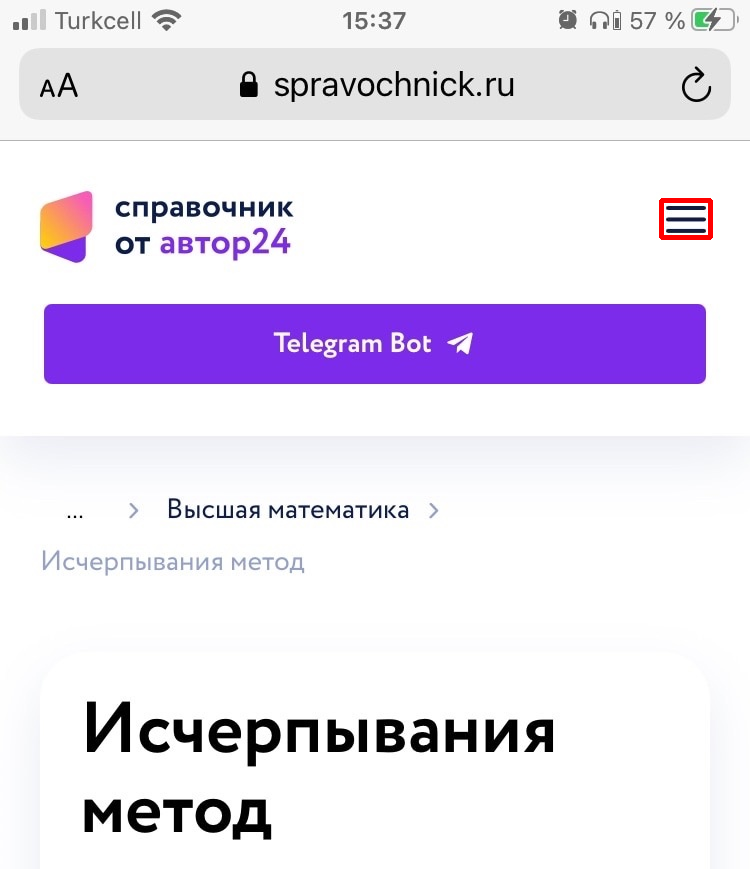

 552.9 ms


In [16]:
start1 = time.time()
draw_predict()
end = time.time()
print(f" {round((end - start1)*1000, 1)} ms")